Hey guys, this is V1.2 of our group assignment. Since different people will be coding this assignment explain every step of the code and be sure to stay consistent with variable names.

I make variable names quite long and spell them out completely. It's intuitive and makes it easier when we start to re-organise cells

#### Changelog

V1.2

-Coded question 2

V1.1

-First file for Californian education
-Coded question 1

## Opening packages

In [1]:
#Importatation of packages

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

S:\Anaconda_3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Opening data

Note the conversion of the .xsl to .xlsx to update file structure. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html

In [2]:
#Opening data

raw_data = pd.read_excel('cal_school_austin.xlsx')
raw_data.head(10)

,Observation Number,dist_cod,county,district,gr_span,students,teachers,student_ratio,computers,comp_rat,expenditure,calw_pct,meal_pct,engl_pct,wage_avg,read_scr,math_scr,test_scr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,17.889910,67,0.343590,6384.911133,0.510200,2.040800,0.000000,22.690001,691.599976,690.000000,690.799988
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,21.524664,101,0.420833,5099.380859,15.416700,47.916698,4.583333,9.824000,660.500000,661.900024,661.200012
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,18.697226,169,0.109032,5501.954590,55.032299,76.322601,30.000002,8.978000,636.299988,650.900024,643.599976
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,17.357143,85,0.349794,7101.831055,36.475399,77.049202,0.000000,8.978000,651.900024,643.500000,647.700012
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,18.671329,171,0.128090,5235.987793,33.108601,78.427002,13.857677,9.080333,641.799988,639.900024,640.849976
5,6,62042,Fresno,Burrel Union Elementary,KK-08,137,6.400000,21.406250,25,0.182482,5580.146973,12.318800,86.956497,12.408759,10.415000,605.700012,605.400024,605.550049
6,7,68536,San Joaquin,Holt Union Elementary,KK-08,195,10.000000,19.500000,28,0.143590,5253.331055,12.903200,94.623703,68.717949,6.577000,604.500000,609.000000,606.750000
7,8,63834,Kern,Vineland Elementary,KK-08,888,42.500000,20.894117,66,0.074324,4565.746094,18.806299,100.000000,46.959461,8.174000,605.500000,612.500000,609.000000
8,9,62331,Fresno,Orange Center Elementary,KK-08,379,19.000000,19.947369,35,0.092348,5355.548340,32.189999,93.139801,30.079157,7.385000,608.900024,616.099976,612.500000
9,10,67306,Sacramento,Del Paso Heights Elementary,KK-06,2247,108.000000,20.805555,0,0.000000,5036.211426,78.994202,87.316399,40.275921,11.613333,611.900024,613.400024,612.650024


In [19]:
raw_data.describe()

,Observation Number,dist_cod,students,teachers,student_ratio,computers,comp_rat,expenditure,calw_pct,meal_pct,engl_pct,wage_avg,read_scr,math_scr,test_scr
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,210.500000,67472.809524,2628.792857,129.067376,19.640425,303.383333,0.135927,5312.407541,13.246042,44.705237,15.768155,15.316588,654.970477,653.342619,654.156548
std,121.387808,3466.994655,3913.104985,187.912679,1.891812,441.341298,0.064956,633.937053,11.454821,27.123381,18.285927,7.225890,20.107980,18.754202,19.053348
min,1.000000,61382.000000,81.000000,4.850000,14.000000,0.000000,0.000000,3926.069580,0.000000,0.000000,0.000000,5.335000,604.500000,605.400024,605.550049
25%,105.750000,64307.750000,379.000000,19.662499,18.582360,46.000000,0.093767,4906.180054,4.395375,23.282200,1.940807,10.639000,640.400024,639.375015,640.049988
50%,210.500000,67760.500000,950.500000,48.564999,19.723208,117.500000,0.125464,5214.516602,10.520450,41.750700,8.777634,13.727800,655.750000,652.449982,654.449982
75%,315.250000,70419.000000,3008.000000,146.350002,20.871815,375.250000,0.164466,5601.401367,18.981350,66.864725,22.970003,17.629001,668.725006,665.849991,666.662506
max,420.000000,75440.000000,27176.000000,1429.000000,25.799999,3324.000000,0.420833,7711.506836,78.994202,100.000000,85.539719,55.327999,704.000000,709.500000,706.750000


## Box Plots

https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

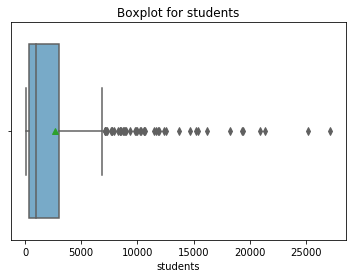

In [3]:
#students

box_plot_students = sns.boxplot(x= raw_data['students'], data= raw_data, palette='Blues', showmeans=True)

plt.title('Boxplot for students')

plt.show()


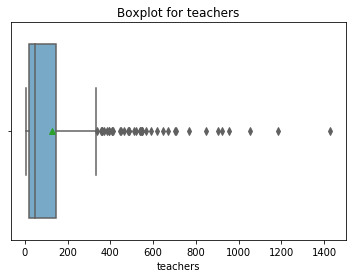

In [4]:
#teachers

box_plot_teachers = sns.boxplot(x= raw_data['teachers'], data= raw_data, palette='Blues', showmeans=True)

plt.title('Boxplot for teachers')

plt.show()

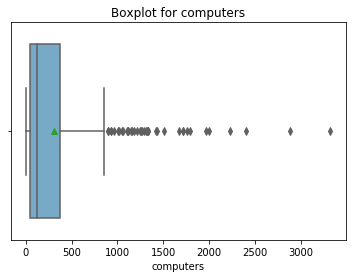

In [5]:
#computers

box_plot_computers = sns.boxplot(x= raw_data['computers'], data= raw_data, palette='Blues', showmeans=True)

plt.title('Boxplot for computers')

plt.show()

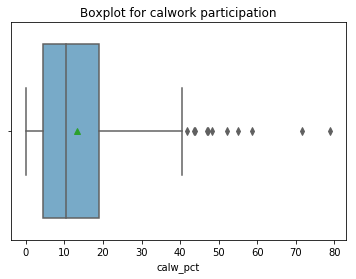

In [6]:
#calw_pct

box_plot_calw_pct = sns.boxplot(x= raw_data['calw_pct'], data= raw_data, palette='Blues', showmeans=True)

plt.title('Boxplot for calwork participation')

plt.show()

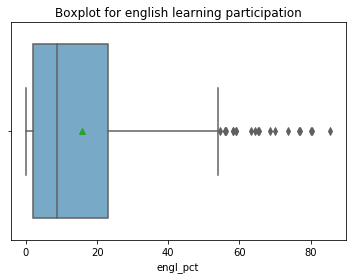

In [7]:
#engl_pct

box_plot_engl_pct = sns.boxplot(x= raw_data['engl_pct'], data= raw_data, palette='Blues', showmeans=True)

plt.title('Boxplot for english learning participation')

plt.show()

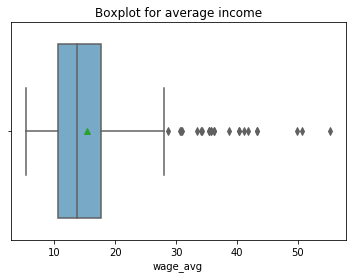

In [8]:
#wage_avg

box_plot_wage_avg = sns.boxplot(x= raw_data['wage_avg'], data= raw_data, palette='Blues', showmeans=True)

plt.title('Boxplot for average income')

plt.show()

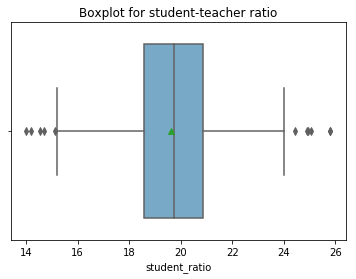

In [47]:
#student_ratio

box_plot_student_ratio = sns.boxplot(x= raw_data['student_ratio'], data= raw_data, palette='Blues', showmeans=True)

plt.title('Boxplot for student-teacher ratio')

plt.show()

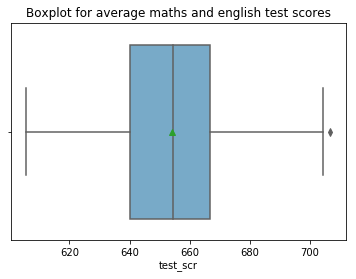

In [49]:
#test_scr

box_plot_test_scr = sns.boxplot(x= raw_data['test_scr'], data= raw_data, palette='Blues', showmeans=True)

plt.title('Boxplot for average maths and english test scores')

plt.show()

## Correlation Heat Map

https://seaborn.pydata.org/generated/seaborn.heatmap.html

#### School characteristics heat map

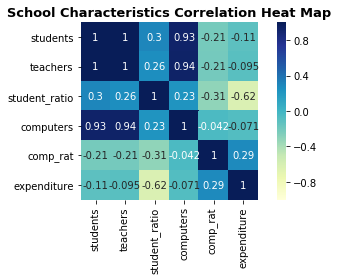

In [9]:
heat_map_1_variables=['students', 'teachers', 'student_ratio', 'computers', 'comp_rat', 'expenditure']

fig, heat_map_1 = plt.subplots()
sns.heatmap(raw_data[heat_map_1_variables].corr(), vmax= 1, vmin= -1, center= 0, square= True, annot= True, ax= heat_map_1, cmap= 'YlGnBu')

heat_map_1.set_title('School Characteristics Correlation Heat Map', fontweight= 'bold', fontsize= 13)

plt.tight_layout()
plt.show()

#### Demographic characteristics heat map

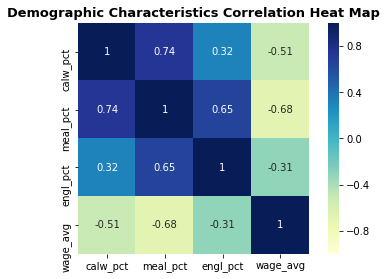

In [10]:
heat_map_2_variables=['calw_pct', 'meal_pct', 'engl_pct', 'wage_avg']

fig, heat_map_2 = plt.subplots()
sns.heatmap(raw_data[heat_map_2_variables].corr(), vmax= 1, vmin= -1, center= 0, square= True, annot= True, ax= heat_map_2, cmap= 'YlGnBu')

heat_map_2.set_title('Demographic Characteristics Correlation Heat Map', fontweight= 'bold', fontsize= 13)

plt.tight_layout()
plt.show()

#### Test score characteristics heat map

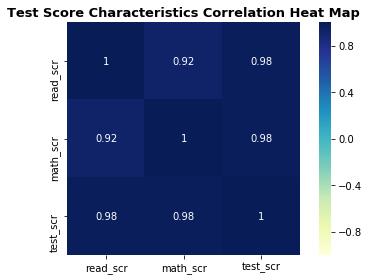

In [11]:
heat_map_3_variables=['read_scr', 'math_scr', 'test_scr']

fig, heat_map_3 = plt.subplots()
sns.heatmap(raw_data[heat_map_3_variables].corr(), vmax= 1, vmin= -1, center= 0, square= True, annot= True, ax= heat_map_3, cmap= 'YlGnBu')

heat_map_3.set_title('Test Score Characteristics Correlation Heat Map', fontweight= 'bold', fontsize= 13)

plt.tight_layout()
plt.show()

#### All variable heat map

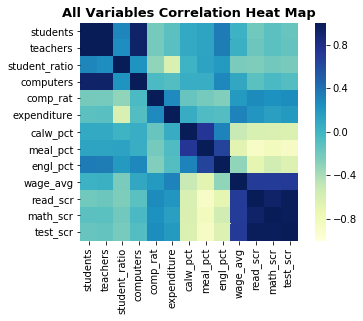

In [12]:
all_variables=['students', 'teachers', 'student_ratio', 'computers', 'comp_rat', 'expenditure', 'calw_pct', 'meal_pct', 'engl_pct', 'wage_avg', 'read_scr', 'math_scr', 'test_scr']

fig, heat_map_4 = plt.subplots()
sns.heatmap(raw_data[all_variables].corr(), vmax= 1, vmin= -1, center= 0, square= True, annot= False, ax= heat_map_4, cmap= 'YlGnBu')

heat_map_4.set_title('All Variables Correlation Heat Map', fontweight= 'bold', fontsize= 13)

plt.show()

## Scatterplot matrix

https://seaborn.pydata.org/generated/seaborn.pairplot.html

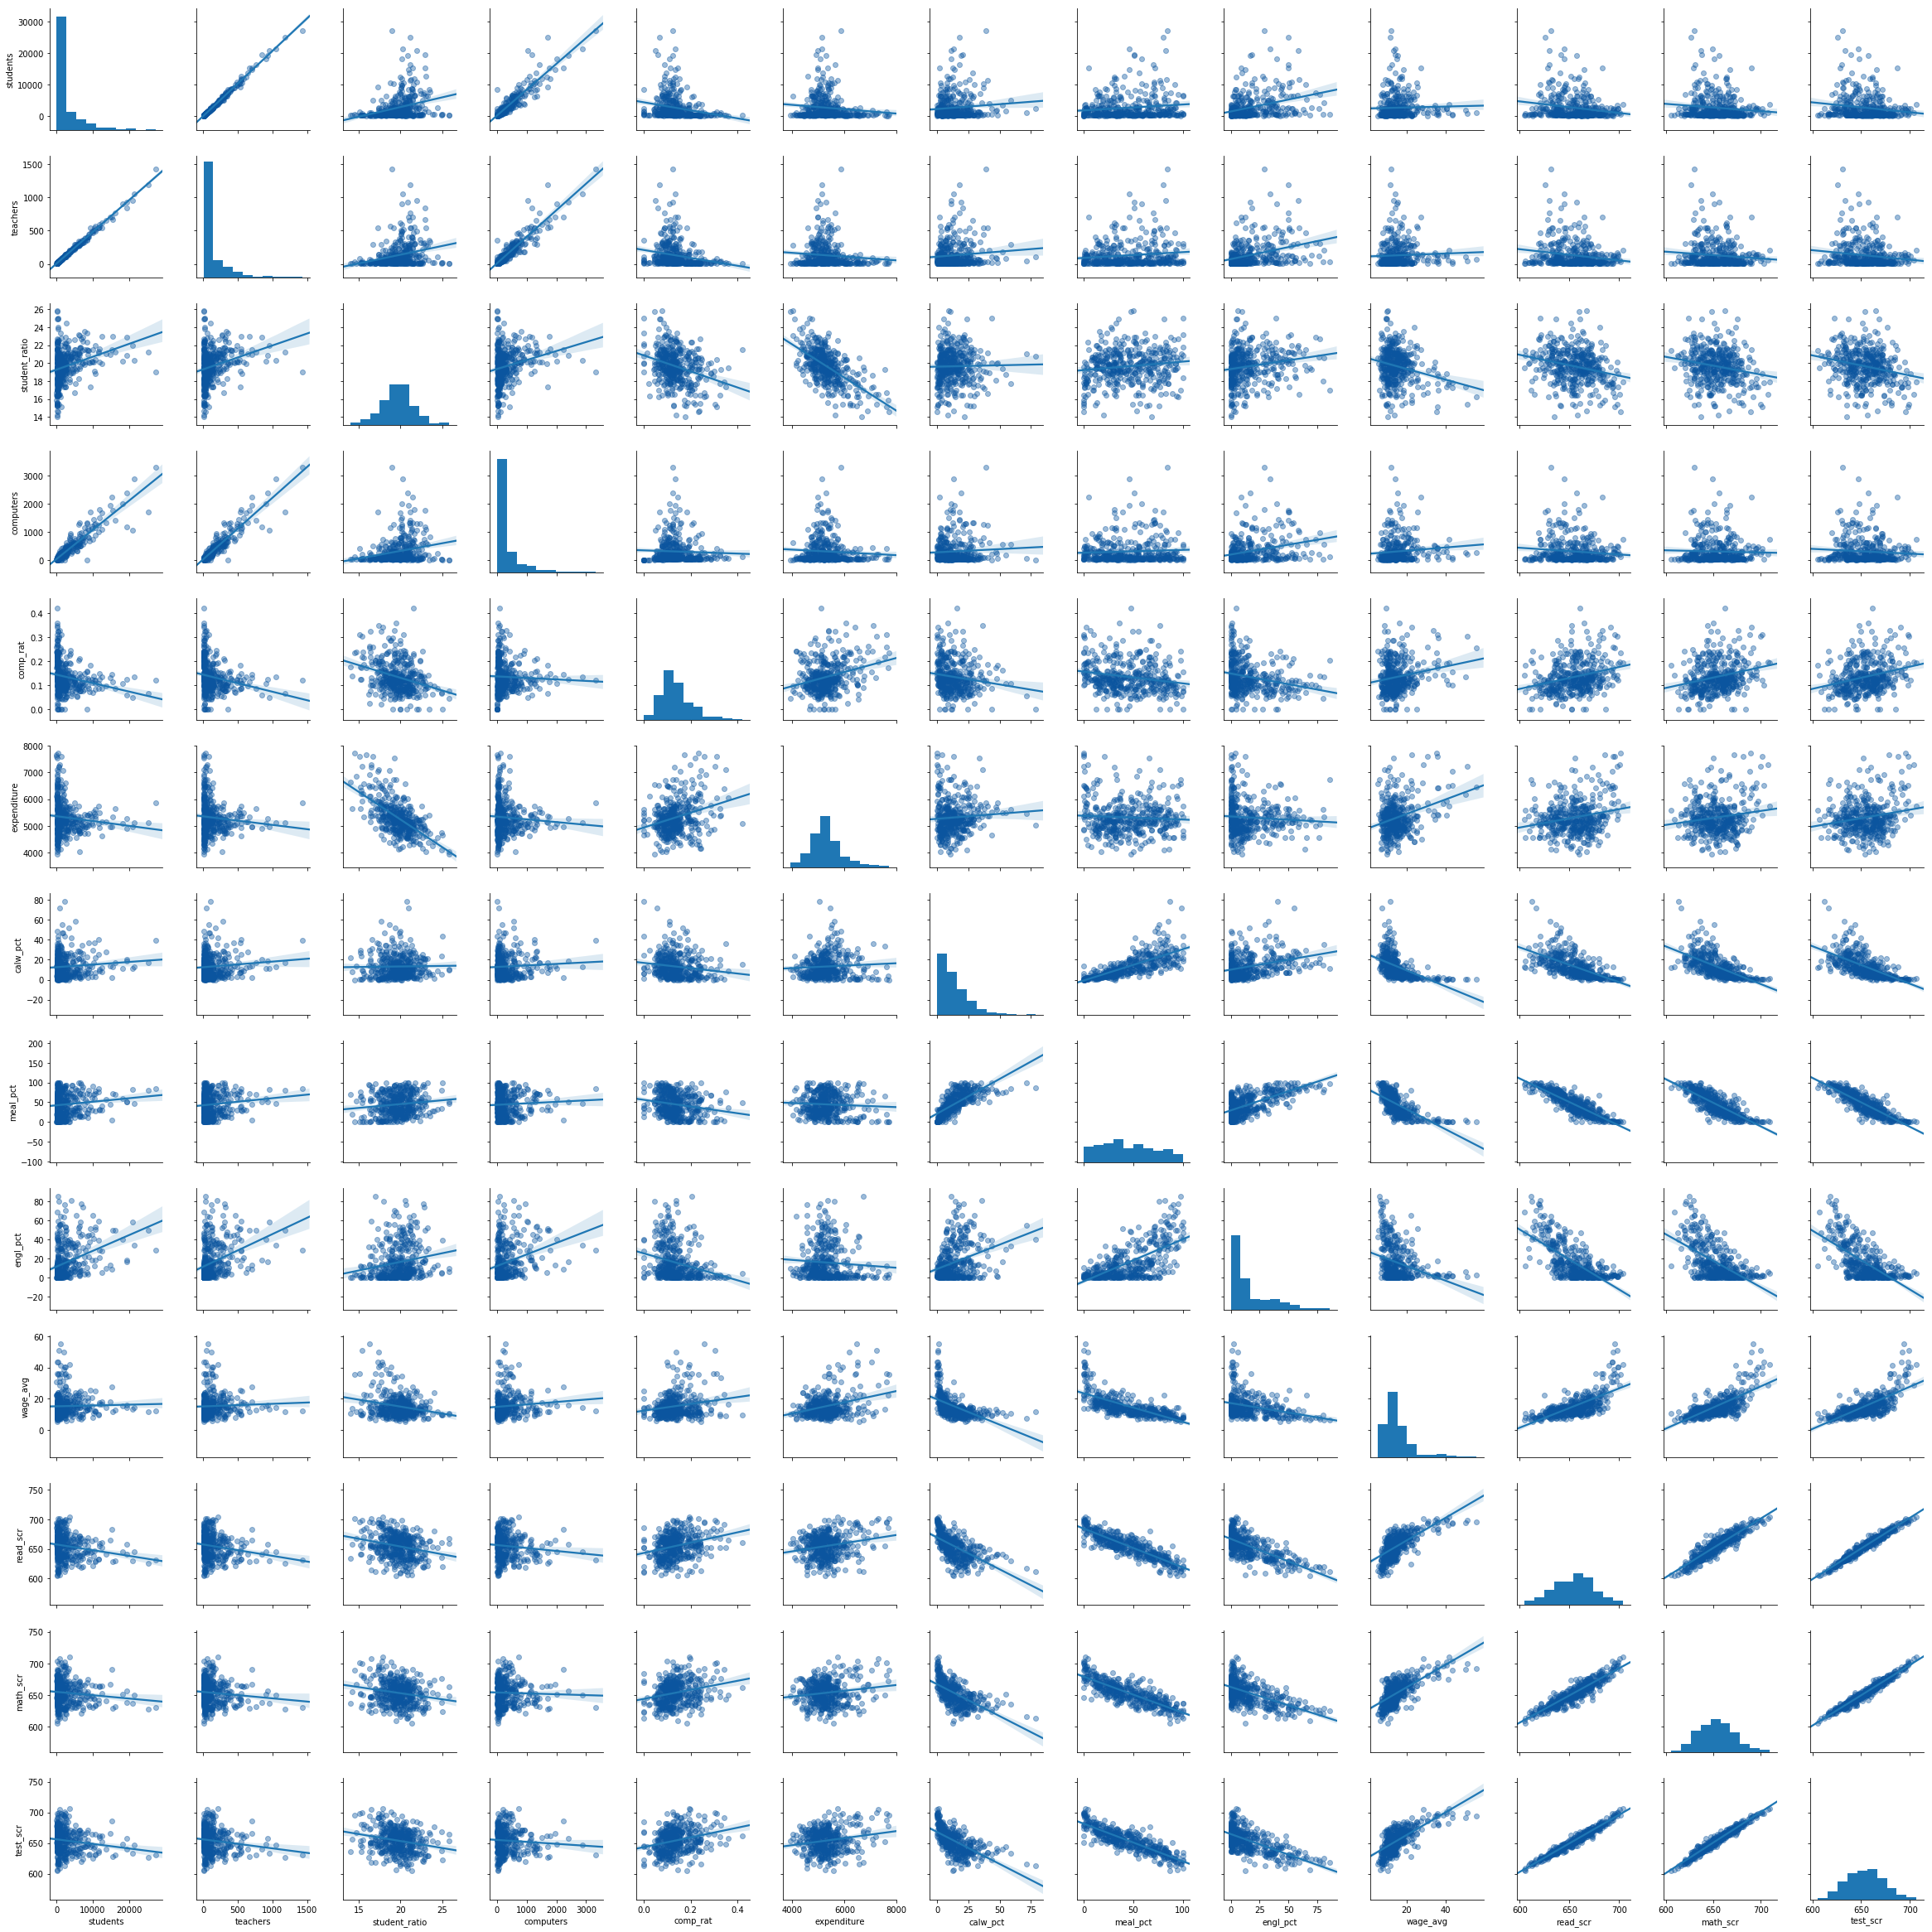

In [13]:
scatterplot_matrix_1 = sns.pairplot(raw_data[all_variables], kind= 'reg', plot_kws = {'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha': 0.4}})

plt.tight_layout()
plt.show()

### SLR with class size and avg. test scores

http://www.statsmodels.org/devel/

Not sure if we should use total student enrollment or student ratio to measure class size. Both variables don't measure class size (class sizes/number of classes). Probably student-teacher ratio is more pertinent (total students/total teachers).

Note horizontal axis is the independent variable. Verticle axis is the dependent variable

#### Hetroscedasticity

We created 2 graphs. One showing a simple scatterplot and another regression plot to determine heteroscedasticity (unequal variance of a variable because of a 2nd variable).

It seems that our data is fairly homoscedastic. Explain why this is important for having an unbiased test

Moreover, the histogram on the axes of the 2nd graph show that our variables appear to follow normal distribution

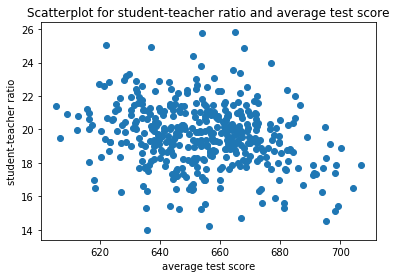

In [33]:
plt.scatter(raw_data['test_scr'], raw_data['student_ratio'])

plt.title('Scatterplot for student-teacher ratio and average test score')
plt.xlabel('average test score')
plt.ylabel('student-teacher ratio')

plt.show()

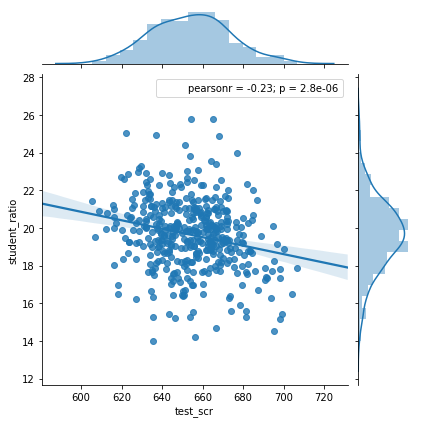

In [34]:
sns.jointplot(x= raw_data['test_scr'], y= raw_data['student_ratio'], kind= 'reg')

#plt.title('Regression plot for student-teacher ratio and average test score')

plt.show()

#### Why use OLS for regression?

We have to justify our estimator

We used a locally-smoothed regression curve (lowess) that somewhat fits our data...it's rather bumpy in the middle but generally follows a gradual negative gradient

Not really sure of what to make of this. Is OLS the best calculation to use as an estimator? We only know LAD and OLS where LAD is used where we can't satisfy LSA 5. So I don't know what to say here.

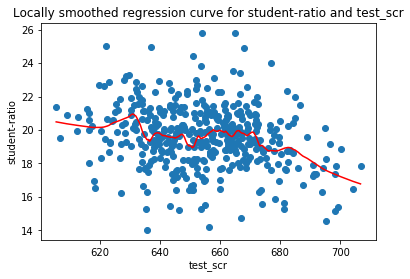

In [38]:
import statsmodels.api as sm

lowess_slr_1 = sm.nonparametric.lowess
plt.scatter(raw_data['test_scr'], raw_data['student_ratio'])
z1 = lowess_slr_1(raw_data['student_ratio'], raw_data['test_scr'], frac=1./10)
plt.plot(z1[:,0],z1[:,1],'red')

plt.title('Locally smoothed regression curve for student-ratio and test_scr')
plt.xlabel('test_scr')
plt.ylabel('student-ratio')

plt.show()

#### Write out the conclusion of the test please. 

In [17]:
import statsmodels.formula.api as smf

slr_1 = smf.ols(formula='student_ratio ~ test_scr', data= raw_data).fit()
slr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          student_ratio   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Wed, 16 May 2018   Prob (F-statistic):           2.78e-06
Time:                        16:47:10   Log-Likelihood:                -852.17
No. Observations:                 420   AIC:                             1708.
Df Residuals:                     418   BIC:                             1716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.3430      3.096     11.094      0.000      28.258      40.428
test_scr      -0.0225      0.005     -4.751      0.000      -0.032      -0.013
==============================================================================
Omnibus:                        7.380   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.025   Jarque-Bera (JB):               11.507
Skew:                          -0.011   Prob(JB):                      0.00317
Kurtosis:                       3.811   Cond. No.                     2.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Plotting resudials to test LSA

https://seaborn.pydata.org/generated/seaborn.residplot.html

Note residuals is plotted with e = Y - Y(hat)

We plotted a locally-smoothed regression curve (lowess) to help determine if there is a pattern in the residuals. Towards higher test scores, there is a negative trend which may indicate a pattern that forms for higher test scores.

The group of data in the residual plot suggests that on average, the residual is 0 for each value of X. This satisfies LSA 1 and 2.

Is our data independent and indentically distributed? Should be perhaps we should take a random sample to make sure to satisfy LSA 3

Furthermore, from our earlier exploratory analysis, the boxplots for test_scr and student_ratio show very little outliers so we can assume that the 4th moments are finite.

#### Now sure how to test constant error variance - I'll get back to this. It's the P(Y l X) is a continuous function

Text(0,0.5,'Residuals')

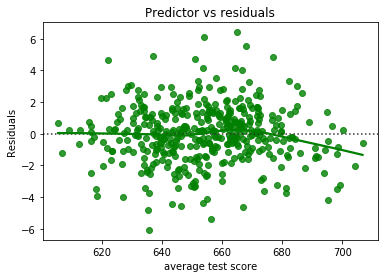

In [46]:
sns.residplot(raw_data['test_scr'], raw_data['student_ratio'], lowess=True, color="g")

plt.title('Predictor vs residuals')
plt.xlabel('average test score')
plt.ylabel('Residuals')

## -----------------------------------------------------

## -----------------------------------------------------

## -----------------------------------------------------

## Test code

#### Assumptions of SLR

LSA 1. Linearity 

Thus since only X is affecting Y, all other factors affecting Y have 0 correlation with X

LSA 2. Exogeneity

E and error = 0

LSA 3. Independence

Our data is i.i.d and the covariance = 0

LSA 4. 4th moments exist 

Where E(Y^4) and E(X^4) < infinity

LSA 5. Constant error variance

The variation of the errors given X is the standard deviation (aka. constant)

#### Test code for plotting scatterplot matrix

In [ ]:
fig, ax = plt.subplots()
variables=['students', 'teachers', 'student_ratio', 'computers', 'comp_rat', 'expenditure']
cmap = sns.diverging_palette(220, 10, as_cmap= True)
sns.heatmap(raw_data[variables].corr(), vmax= 1, vmin= -1, center= 0, square= True, annot= True, ax= ax,  cmap= cmap)
ax.set_title('Correlation heat map', fontweight= 'bold', fontsize= 13)
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots()
variables=['students', 'teachers', 'student_ratio', 'computers', 'comp_rat', 'expenditure']
sns.heatmap(raw_data[variables].corr(), vmax= 1, vmin= -1, center= 0, square= True, annot= True, ax= ax,  cmap= 'YlGnBu')
ax.set_title('Correlation heat map', fontweight= 'bold', fontsize= 13)
plt.tight_layout()
plt.show()

#### Test code for regression plot

NameError: name 'reg' is not defined

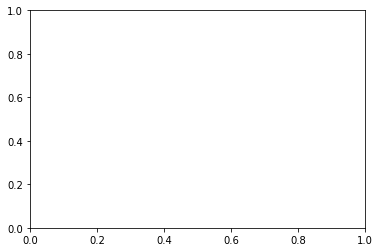

In [43]:
fig, residual_slr_1= plt.subplots()
sns.regplot(raw_data['test_scr'], reg.resid, fit_reg= False)

ax.set_xlabel('average test score')
ax.set_ylabel('Residuals')
ax.set_title('Predictor vs residuals')

plt.show()

In [ ]:
resid1 = reg.resid
resid2 = res.resid
fit1 = reg.fittedvalues
fit2 = res.fittedvalues
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(AUUSdat2['US_lag_log_r'], resid2)
ax1.set_title("LAD residuals vs SP500")
ax2.scatter(AUUSdat2['US_lag_log_r'], resid1)
ax2.set_title("OLS residuals vs SP500")
plt.show()